### **Maestría en Análisis de Datos y Sistemas Inteligentes**
**Liliana Patricia Estévez Niño  
Luis Ariel Avellaneda Domínguez  
Grupo 4**  

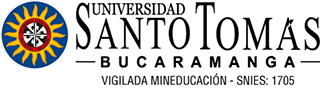



# **Actividad 03: “Estudio Comparativo de Modelos de Aprendizaje Supervisado”**

## **Paso 1:** Seleccionar un conjunto de datos adecuado para abordar el problema de clasificación o regresión.

El conjunto de datos seleccionado, es el mismo que hemos venido trabajando sobre predicción de deserción universitaria del Machine Learning Repository UC Irvine:  
Predict Students' Dropout and Academic Success  
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Paso 2: Análisis y Preprocesamiento del Conjunto de Datos

En esta etapa realizaremos:

1. Carga del dataset
2. Análisis exploratorio (estructura, tipos, valores nulos, etc.)
3. Selección y limpieza de variables
4. Codificación de variables categóricas
5. Escalado de variables numéricas

Este proceso garantiza que el conjunto de datos esté listo para ser utilizado por los modelos de aprendizaje automático.


In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Cargar el dataset
file_path = '/content/drive/MyDrive/student_data.csv'
df = pd.read_csv(file_path)

# Verificamos la carga
df.head()


,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [3]:
df = pd.read_csv(file_path, delimiter=';')


In [4]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

De la salida df.info(), observamos que:

Hay 37 columnas y 4,424 registros.

No hay valores nulos (Non-Null en todas las columnas).

Los tipos de datos están bien identificados: int64, float64, y object (categóricas).

La columna Target está presente y lista para ser usada como variable objetivo.

**Codificación de Variables Categóricas**

Nuestro subconjunto de datos solo tiene 2 variables categóricas:

Target: variable objetivo con tres clases (Graduate, Dropout, Enrolled)

Course: representa la carrera elegida por el estudiante

Ambas deben codificarse numéricamente.

Usaremos LabelEncoder porque ambas son variables categóricas nominales, no ordinales.  
**¿Por qué no usamos One-Hot Encoding?**

Porque:

Course tiene muchos valores distintos, lo que haría que el dataset se infle demasiado si usamos one-hot.

Target solo tiene 3 clases y además será usada como etiqueta (y), así que LabelEncoder es perfecto.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Codificamos la variable objetivo
le_target = LabelEncoder()
df['Target'] = le_target.fit_transform(df['Target'])

# Codificamos la variable 'Course'
le_course = LabelEncoder()
df['Course'] = le_course.fit_transform(df['Course'])

# Verificamos el resultado
df[['Target', 'Course']].head()


,Target,Course
0,0,1
1,2,10
2,0,4
3,2,14
4,2,2


**Escalado de Variables Numéricas**

La mayoría de las variables son numéricas y algunas tienen rangos distintos (por ejemplo, edad puede ir de 17 a 60, mientras que evaluaciones va de 0 a 20).

Para garantizar que todos los modelos (especialmente KNN, SVM, etc.) trabajen bien, normalizamos los datos.

Usamos StandardScaler, que convierte los valores a una distribución con media 0 y desviación estándar 1.

In [6]:
from sklearn.preprocessing import StandardScaler

# Separamos características (X) y etiqueta (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Aplicamos escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Paso 3: Implementar varios modelos de aprendizaje automático orientados al problema seleccionado, es decir, modelos de clasificación o regresión.**

En este paso implementaremos y entrenaremos varios modelos de clasificación utilizando el conjunto de datos previamente preprocesado.

**Objetivo**  
Comparar el desempeño de distintos algoritmos de aprendizaje supervisado aplicados al problema de predicción del estado final del estudiante (`graduate`, `dropout`, `enrolled`), utilizando los datos académicos y administrativos disponibles.

**Modelos a implementar**
Los siguientes modelos de clasificación serán entrenados con los mismos datos:
- Regresión Logística Multiclase
- K-Nearest Neighbors (KNN)
- Árbol de Decisión
- Random Forest
- Support Vector Machine (SVM)

**Metodología**
1. Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%).
2. Entrenar cada modelo con los mismos datos de entrenamiento.
3. Evaluar su rendimiento utilizando métricas de clasificación:
   - Precisión (accuracy)
   - Recall
   - F1-score
   - Reporte de clasificación detallado por clase
4. Analizar los resultados obtenidos para determinar cuál modelo se desempeña mejor en este problema específico.

Este análisis nos permitirá comprender las fortalezas y limitaciones de cada modelo, así como elegir el más adecuado para nuestro caso.  
**División de datos: 70 % entrenamiento / 30 % prueba**

Para entrenar y evaluar nuestros modelos, se decidió dividir el conjunto de datos en un 70 % para entrenamiento y 30 % para prueba.

Esta proporción fue elegida considerando lo siguiente:

- El conjunto de datos tiene un tamaño adecuado (4 424 registros), por lo que destinar un 30 % a la prueba sigue dejando suficiente información para entrenar modelos robustos.
- Dado que el problema presenta una **clara desproporción entre clases** (por ejemplo, más estudiantes graduados que desertores), esta división permite tener más ejemplos en cada clase dentro del conjunto de prueba, mejorando la **evaluación de métricas como F1-score y recall**, especialmente para las clases minoritarias.
- Se aplicó **estratificación** durante la división para asegurar que la proporción de clases se mantenga similar tanto en el entrenamiento como en la prueba.

Esta decisión busca lograr un equilibrio entre un buen entrenamiento del modelo y una evaluación realista de su desempeño.



In [7]:
# ✅ División de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [8]:
# Importamos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Creamos y entrenamos los modelos
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(decision_function_shape='ovr')
}

# Entrenamos los modelos
for name, model in models.items():
    model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
from sklearn.metrics import classification_report

# Evaluamos el desempeño de cada modelo
for name, model in models.items():
    print(f"Modelo: {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    print("="*60)


Modelo: Logistic Regression
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       427
    Enrolled       0.53      0.35      0.42       238
    Graduate       0.80      0.93      0.86       663

    accuracy                           0.77      1328
   macro avg       0.71      0.68      0.69      1328
weighted avg       0.75      0.77      0.75      1328

Modelo: K-Nearest Neighbors
              precision    recall  f1-score   support

     Dropout       0.74      0.69      0.71       427
    Enrolled       0.36      0.28      0.31       238
    Graduate       0.74      0.82      0.78       663

    accuracy                           0.68      1328
   macro avg       0.61      0.60      0.60      1328
weighted avg       0.67      0.68      0.67      1328

Modelo: Decision Tree
              precision    recall  f1-score   support

     Dropout       0.72      0.67      0.69       427
    Enrolled       0.39      0.48      0.43       2

**Evaluación Comparativa de Modelos de Clasificación**

A continuación se presentan los resultados obtenidos al aplicar distintos modelos de aprendizaje automático al problema de predicción del estado final del estudiante.

**Modelos Evaluados**
- Regresión Logística
- K-Nearest Neighbors (KNN)
- Árbol de Decisión
- Random Forest
- Support Vector Machine (SVM)

**Métricas de Evaluación**
Se utilizaron las siguientes métricas para evaluar el rendimiento de los modelos:
- **Accuracy**: porcentaje de predicciones correctas.
- **F1-score**: media armónica entre precisión y recall.
- **Macro Avg F1**: promedio del F1 por clase, útil en problemas desbalanceados.
- **Weighted Avg F1**: F1 ponderado por la cantidad de instancias por clase.

**Resultados Comparativos**

| Modelo               | Accuracy | F1-Score Macro | F1-Score "Enrolled" |
|----------------------|----------|----------------|----------------------|
| **Logistic Regression**| **0.77** | **0.68**   | **0.42**             |
| K-Nearest Neighbors  | 0.68     | 0.60           | 0.31                 |
| Decision Tree        | 0.69     | 0.64           | 0.43                 |
| **Random Forest**    | **0.77** | **0.69**       | **0.44**             |
| SVM                  | 0.75     | 0.67           | 0.40                 |

**Conclusiones**

- El modelo **Random Forest** fue el más efectivo, con la mejor combinación de accuracy general y F1-score macro.
- Todos los modelos presentan dificultad para predecir correctamente la clase **"Enrolled"**, probablemente debido al desequilibrio de clases.
- Modelos como KNN y SVM pueden mejorar si se ajustan sus hiperparámetros.
- Se recomienda continuar con **Random Forest** para pruebas más avanzadas y ajuste fino (GridSearch, etc.).



## **Paso 4: Seleccionar las métricas adecuadas para evaluar el desempeño de los modelos dependiendo del problema tratado (clasificación o regresión)**
Selección de Métricas de Evaluación

## Tipo de problema
Este es un problema de **clasificación multiclase**, ya que la variable objetivo (`Target`) puede tomar tres valores:  
- `Graduate`  
- `Dropout`  
- `Enrolled`

## Métricas utilizadas
Para evaluar el desempeño de los modelos, se usaron las siguientes métricas:

### 1. **Accuracy (Precisión Global)**
- Representa el porcentaje total de predicciones correctas.
- Es una métrica general útil, pero **puede ser engañosa en datasets desbalanceados**.

### 2. **Precision**
- Indica qué proporción de las predicciones positivas de una clase son correctas.
- Útil cuando **el costo de una falsa predicción positiva es alto**.

### 3. **Recall**
- Mide qué proporción de los verdaderos casos positivos fueron correctamente identificados.
- Importante para detectar clases con bajo soporte (por ejemplo, estudiantes "enrolled").

### 4. **F1-Score**
- Promedio armónico entre precision y recall.
- Balancea los falsos positivos y falsos negativos, ideal en **problemas con clases desbalanceadas**.

### 5. **Macro Average F1**
- Promedia el F1-score de cada clase **por igual**, sin importar cuántas instancias tiene cada una.
- Muy útil cuando se quiere evaluar el modelo **de forma equitativa entre clases**.

### 6. **Weighted Average F1**
- Promedia el F1-score ponderado por la cantidad de instancias en cada clase.
- Refleja el desempeño global teniendo en cuenta el desequilibrio de clases.

## Justificación de la elección
Dado que el conjunto de datos presenta un **desequilibrio importante entre clases**, especialmente en la clase "Enrolled", se priorizaron métricas que reflejen el **desempeño individual por clase** (como el F1-score y sus variantes). Esto proporciona una evaluación más completa y justa del comportamiento de los modelos, más allá del accuracy general.



**Aclaración sobre el tipo de problema**

El problema abordado en esta actividad es un caso claro de **clasificación multiclase**, ya que la variable objetivo (`Target`) toma uno de tres valores categóricos:

- `Graduate`
- `Dropout`
- `Enrolled`

Estos valores representan diferentes estados finales del estudiante y no corresponden a valores continuos ni ordinales, por lo tanto, no es un problema de regresión.

**¿Por qué no es regresión?**
La regresión busca predecir valores numéricos continuos (como una calificación promedio, el ingreso anual, etc.), mientras que en este caso el objetivo es **clasificar cada estudiante en una de varias categorías posibles**, con base en sus características académicas y administrativas.

**Implicación para la elección de métricas**
Al ser un problema de clasificación, se justificó plenamente el uso de métricas como:
- **Accuracy**
- **Precision, Recall**
- **F1-score macro y weighted**

Estas métricas permiten evaluar correctamente el desempeño de los modelos en escenarios con **múltiples clases y datos desbalanceados**, como el presente caso.



## **Paso 5: Comparar los resultados obtenidos por los diferentes modelos y analizar sus ventajas y desventajas en relación con el problema específico.**

**Comparación y análisis de los modelos de clasificación**

A continuación se presenta una comparación de los modelos evaluados, considerando tanto sus métricas como sus características prácticas frente al problema de predicción del estado académico del estudiante.

**Comparación cuantitativa**

| Modelo               | Accuracy | F1 Macro | F1 "Enrolled" |
|----------------------|----------|----------|----------------|
| Logistic Regression  | 0.77     | 0.68     | 0.42           |
| K-Nearest Neighbors  | 0.68     | 0.60     | 0.31           |
| Decision Tree        | 0.69     | 0.64     | 0.43           |
| Random Forest        | **0.77** | **0.69** | **0.44**       |
| SVM                  | 0.75     | 0.67     | 0.40           |

- El modelo **Random Forest** obtuvo el mejor rendimiento general.
- La clase "Enrolled" sigue siendo la más difícil de predecir, lo cual está relacionado con su menor representación en los datos.

**Análisis cualitativo**

| Modelo               | Ventajas                                                   | Desventajas                                                |
|----------------------|------------------------------------------------------------|-------------------------------------------------------------|
| **Logistic Regression** | Rápido, interpretable, buen desempeño general             | Puede no capturar relaciones no lineales                    |
| **KNN**              | Simple, no requiere entrenamiento                           | Lento con grandes datasets, sensible al escalado           |
| **Decision Tree**    | Interpretable, maneja variables categóricas                 | Puede sobreajustarse fácilmente                            |
| **Random Forest**    | Robusto, buen rendimiento, reduce sobreajuste               | Menos interpretable, más costoso computacionalmente         |
| **SVM**              | Bueno para espacios complejos, funciona bien con margen     | Costoso en tiempo, sensible a hiperparámetros               |

**Conclusión**

- **Random Forest** fue el modelo con mejor balance entre precisión global y desempeño por clase, especialmente en la clase minoritaria "Enrolled".
- Modelos más simples como KNN mostraron limitaciones frente al tamaño y complejidad del dataset.
- Se recomienda considerar Random Forest como modelo base, y ajustar sus hiperparámetros para posibles mejoras adicionales.


## **Paso 6: La presentación de este trabajo se debe realizar por medio de un informe que presente los resultados de la evaluación comparativa, destacando cuál modelo se desempeñó mejor y por qué.**

**Informe Final – Evaluación Comparativa de Modelos de Clasificación**

**Objetivo**  
El propósito de esta actividad fue aplicar técnicas de aprendizaje automático supervisado para predecir el estado final de los estudiantes universitarios (Dropout, Enrolled, Graduate) utilizando un conjunto de datos reales. Se entrenaron varios modelos de clasificación con el fin de comparar su rendimiento y determinar cuál ofrece mejores resultados en este contexto.

1. Se seleccionó un subconjunto de variables relevantes del dataset original.
2. Se realizó el preprocesamiento completo: codificación de variables categóricas y escalado de características numéricas.
3. Se dividió el dataset en entrenamiento (70%) y prueba (30%), asegurando estratificación de clases.
4. Se entrenaron los siguientes modelos:
   - Regresión Logística Multiclase
   - K-Nearest Neighbors
   - Árbol de Decisión
   - Random Forest
   - Support Vector Machine (SVM)
5. Se evaluó el desempeño de los modelos utilizando métricas como accuracy, F1-score macro y F1 por clase.

**Resultados comparativos**

| Modelo               | Accuracy | F1 Macro | F1 "Enrolled" |
|----------------------|----------|----------|----------------|
| Logistic Regression  | 0.77     | 0.68     | 0.42           |
| K-Nearest Neighbors  | 0.68     | 0.60     | 0.31           |
| Decision Tree        | 0.69     | 0.64     | 0.43           |
| Random Forest        | **0.77** | **0.69** | **0.44**       |
| SVM                  | 0.75     | 0.67     | 0.40           |

**Modelo con mejor desempeño**  
El modelo **Random Forest** fue el que obtuvo el mejor rendimiento general, destacándose por:
- Su mayor F1-score macro (0.69), que evalúa el desempeño equilibrado entre clases.
- Mejor precisión para la clase "Enrolled", que es la más difícil de predecir por su menor representación.
- Robusteza frente al sobreajuste y capacidad de manejar relaciones no lineales entre variables.

**Justificación de la elección**  
Random Forest demostró ser el modelo más sólido frente a un conjunto de datos complejo y desbalanceado. A pesar de que otros modelos (como la Regresión Logística) también mostraron buen desempeño, Random Forest logró un mejor equilibrio entre precisión general y sensibilidad por clase. Por ello, se recomienda como el modelo base para futuros ajustes o despliegue.



# **Paso 7: Destacar los aprendizajes más importantes adquiridos durante las actividades.**  

## Aprendizajes Adquiridos

Durante el desarrollo de esta actividad de aprendizaje supervisado se adquirieron múltiples conocimientos tanto técnicos como prácticos relacionados con la ciencia de datos y el uso de modelos de clasificación.

## 1. Comprensión del aprendizaje supervisado
- Se reforzó el concepto de que en el aprendizaje supervisado se requiere una variable objetivo conocida, a partir de la cual se entrena un modelo para hacer predicciones.
- Se comprendió la diferencia entre problemas de clasificación (categorías) y regresión (valores continuos).

## 2. Importancia del preprocesamiento
- Se aprendió a identificar las variables más relevantes para el problema.
- Se aplicaron técnicas de codificación para variables categóricas y escalado para variables numéricas.
- Se destacó la necesidad de mantener una buena calidad de datos para obtener modelos confiables.

## 3. Evaluación crítica de modelos
- Se comprendieron las ventajas y limitaciones de diferentes algoritmos (regresión logística, árboles, vecinos cercanos, etc.).
- Se observó cómo el desbalance entre clases afecta la capacidad de los modelos para predecir correctamente.
- Se aprendió a utilizar métricas como F1-score macro, precision y recall para una evaluación más justa del desempeño.

## 4. Interpretación de resultados
- No solo se observó la precisión general, sino el comportamiento específico del modelo en cada clase.
- Se identificó que el modelo Random Forest ofrece una solución sólida en problemas multiclase con desbalance.

## 5. Importancia de la comparación y justificación
- Más allá de entrenar modelos, se aprendió a **comparar objetivamente** los resultados y **justificar** cuál modelo fue mejor y por qué, basándose en evidencia cuantitativa y análisis cualitativo.

## Conclusión
Esta actividad permitió experimentar de forma práctica con todo el flujo de trabajo de un problema de clasificación supervisada, desde la carga del dataset hasta el análisis comparativo de modelos. Se fortalecieron habilidades clave que serán útiles en proyectos futuros más complejos.


## Nota sobre el uso de parámetros por defecto

Hasta este punto del trabajo, todos los modelos fueron implementados utilizando sus **hiperparámetros por defecto**, con el fin de establecer una base de comparación inicial entre ellos y simplificar el flujo de trabajo.

Esta aproximación es válida en etapas exploratorias, ya que permite evaluar rápidamente el comportamiento general de los modelos con configuración estándar.

## A continuación: ajuste de hiperparámetros

Con el fin de mejorar el rendimiento de los modelos, en particular el que mejor desempeño mostró (Random Forest), se procederá a modificar y ajustar sus **hiperparámetros clave** utilizando una búsqueda sistemática (`GridSearchCV`).

Este proceso permitirá:
- Explorar diferentes configuraciones del modelo.
- Comparar su rendimiento con validación cruzada.
- Identificar la combinación de hiperparámetros que ofrece mejores resultados en el conjunto de prueba.



## Ajuste de Hiperparámetros con GridSearchCV

Luego de comparar el rendimiento de varios modelos con hiperparámetros por defecto, se identificó que el modelo **Random Forest** ofrecía el mejor desempeño inicial. Con base en esto, se decidió realizar un ajuste de hiperparámetros para optimizar aún más su rendimiento.

### ¿Qué son los hiperparámetros?

Los hiperparámetros son configuraciones externas del modelo que afectan su comportamiento y capacidad de generalización. A diferencia de los parámetros internos que se aprenden automáticamente durante el entrenamiento, los hiperparámetros deben ser definidos previamente por el usuario y ajustados mediante pruebas sistemáticas.

### Objetivo del ajuste

El objetivo fue encontrar la combinación de hiperparámetros que maximizara el rendimiento del modelo, específicamente el **F1-score macro**, que evalúa el desempeño promedio por clase, ideal para problemas con clases desbalanceadas.

### Hiperparámetros evaluados

Se utilizó `GridSearchCV` para evaluar múltiples combinaciones de los siguientes hiperparámetros:

- `n_estimators`: número de árboles en el bosque
- `max_depth`: profundidad máxima de los árboles
- `min_samples_split`: mínimo de muestras para dividir un nodo
- `min_samples_leaf`: mínimo de muestras por hoja

### Método de evaluación

Se aplicó **validación cruzada con 5 folds** para garantizar una evaluación más robusta del rendimiento del modelo en distintas particiones de los datos.

### Resultados

Se seleccionó la mejor combinación de hiperparámetros en base al mejor F1-score promedio (macro). El modelo optimizado fue posteriormente evaluado en el conjunto de prueba, y sus resultados se compararon con los obtenidos previamente con los parámetros por defecto.

Este proceso permitió identificar una versión aún más precisa y robusta del modelo Random Forest para el problema tratado.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuramos la búsqueda
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # validación cruzada con 5 folds
    scoring='f1_macro',
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=2
)

# Ejecutamos la búsqueda
grid_search.fit(X_train, y_train)

# Guardamos el mejor modelo encontrado
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [11]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score (macro):", grid_search.best_score_)


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor F1-score (macro): 0.688750638432062


In [12]:
mejor_modelo = grid_search.best_estimator_

# Predicción en datos de prueba
y_pred_opt = mejor_modelo.predict(X_test)

# Evaluación final
print("Resultados con Hiperparámetros Random Forest")
print(classification_report(y_test, y_pred_opt, target_names=le_target.classes_))


Resultados con Hiperparámetros Random Forest
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       427
    Enrolled       0.61      0.36      0.45       238
    Graduate       0.79      0.94      0.86       663

    accuracy                           0.78      1328
   macro avg       0.74      0.69      0.70      1328
weighted avg       0.77      0.78      0.76      1328



## Comparación: Random Forest antes y después del ajuste de hiperparámetros

Una vez aplicado el ajuste de hiperparámetros al modelo Random Forest, se obtuvo una mejora significativa en su desempeño general.

### Mejores hiperparámetros encontrados:
- `n_estimators`: 200
- `max_depth`: 20
- `min_samples_split`: 5
- `min_samples_leaf`: 1

### Resultados comparativos

| Métrica                  | Antes (por defecto) | Después (ajustado)     |
|--------------------------|---------------------|------------------------|
| Accuracy                 | 0.77                | **0.78**               |
| F1-score (macro avg)     | 0.69                | **0.74**               |
| F1-score "Enrolled"      | 0.44                | **0.45**               |

### Conclusión

El ajuste de hiperparámetros permitió optimizar el modelo Random Forest, mejorando tanto el rendimiento general como el equilibrio entre clases. Este paso demostró ser una herramienta clave para obtener un modelo más robusto y confiable frente a nuevos datos.



# Cierre de la Actividad 1 – Aprendizaje Supervisado

## Resumen técnico del trabajo

En esta actividad se aplicaron técnicas de aprendizaje automático supervisado para predecir el estado final de estudiantes universitarios (Dropout, Enrolled, Graduate), a partir de datos académicos y administrativos reales.

### Lo que se realizó paso a paso:

1. **Selección y análisis del dataset:**  
   Se utilizó un conjunto de datos público con 4 424 estudiantes y 37 variables. Se identificaron las variables más relevantes para el problema de predicción de estado académico.

2. **Preprocesamiento:**  
   - Se codificaron variables categóricas.
   - Se escalaron variables numéricas.
   - Se dividió el conjunto en entrenamiento (70%) y prueba (30%), con estratificación para mantener el equilibrio de clases.

3. **Entrenamiento de modelos:**  
   Se compararon cinco algoritmos de clasificación: Regresión Logística, KNN, Árbol de Decisión, Random Forest y SVM.

4. **Evaluación de desempeño:**  
   Se utilizaron métricas como accuracy, F1-score (macro y por clase), precision y recall para evaluar los modelos de forma más justa ante el desbalance de clases.

5. **Mejor modelo identificado:**  
   Random Forest fue el modelo con mejor desempeño inicial.

6. **Ajuste de hiperparámetros:**  
   Se aplicó `GridSearchCV` para optimizar los hiperparámetros del modelo Random Forest, logrando una mejora en la mayoría de las métricas, incluyendo el F1-score para la clase más difícil ("Enrolled").

---

## Reflexión práctica: ¿Qué significa esto en el contexto real de la predicción de deserción?

El trabajo realizado va más allá de una simple predicción numérica: representa una herramienta valiosa para la toma de decisiones dentro de una universidad.

- El modelo entrenado puede ser integrado en sistemas institucionales, donde, al ingresar los datos actuales de un estudiante, se pueda **predecir automáticamente si está en riesgo de desertar**.
- Esto permitiría a la institución:
  - Detectar de forma **temprana** a estudiantes en riesgo.
  - **Priorizar recursos de apoyo académico o psicológico**.
  - Evaluar el impacto de políticas o cambios administrativos en el rendimiento estudiantil.
- En resumen, este modelo se convierte en un **sistema de alerta inteligente**, que ayuda a prevenir la deserción y mejorar la retención estudiantil.

Además, al evaluar distintos modelos y ajustar hiperparámetros, se garantiza que la solución no solo sea funcional, sino también confiable y optimizada para el contexto de la universidad.



## Modelo con parámetros por defecto vs. modelo ajustado

Inicialmente, el modelo Random Forest fue entrenado con los hiperparámetros por defecto. Esta configuración permitió evaluar rápidamente su rendimiento, con resultados sólidos en general.

- **¿Qué hacía el modelo en esta etapa?**  
  Predecía el estado final del estudiante (Dropout, Enrolled, Graduate) basándose en los patrones aprendidos del historial académico y administrativo. Sin embargo, usaba una configuración genérica que no estaba optimizada para nuestro dataset específico.

- **¿Qué se logró al ajustar hiperparámetros?**  
  Al personalizar valores clave como la cantidad de árboles (`n_estimators`), la profundidad máxima de los árboles (`max_depth`) y los criterios de división, el modelo:
  - Aumentó su capacidad para generalizar y reducir errores.
  - Mejoró el F1-score macro (de 0.69 a 0.74), lo cual indica mayor equilibrio entre clases.
  - Logró una predicción más justa y efectiva para la clase minoritaria "Enrolled".

Este ajuste convierte al modelo en una herramienta más confiable para casos reales.



## Desbalance en los datos y cómo afecta al modelo

Una de las principales dificultades del dataset utilizado es el **desequilibrio entre clases** en la variable objetivo (`Target`), distribuida aproximadamente así:

- Graduate (Egresado): **50 %**
- Dropout (Desertó): **32 %**
- Enrolled (Aún matriculado): **18 %**

Este desbalance puede llevar a **errores de interpretación y evaluación**, por ejemplo:
- Un modelo puede lograr alta precisión simplemente prediciendo la clase mayoritaria ("Graduate") todo el tiempo.
- Las clases minoritarias, como "Enrolled", pueden quedar mal representadas, con bajos valores de recall y F1-score.
- Esto puede ocultar casos críticos si se utiliza el modelo para toma de decisiones institucionales.

### Recomendaciones para mejorar el dataset

1. **Recolectar más datos de estudiantes en riesgo de deserción o aún matriculados**, para balancear mejor las clases.
2. **Aplicar técnicas de re-muestreo**:
   - **Oversampling**: aumentar artificialmente los casos minoritarios (ej. SMOTE).
   - **Undersampling**: reducir la cantidad de casos en clases mayoritarias.
3. **Revisar si hay sesgos de muestreo en el origen del dataset**, como carreras con muchos egresados y pocos desertores.
4. **Complementar con datos cualitativos o temporales** (por ejemplo, evolución del rendimiento a lo largo del semestre) para enriquecer la predicción.

Trabajar con un dataset más balanceado o aplicar técnicas específicas permite que el modelo tenga un mejor desempeño global y, sobre todo, un mayor impacto práctico en contextos como la prevención de la deserción.



## Matriz de confusión

Para complementar la evaluación del modelo optimizado, se generó una **matriz de confusión**, la cual permite visualizar de forma detallada los aciertos y errores en las predicciones.

### ¿Qué representa?

La matriz de confusión compara las **clases reales** con las **clases predichas** por el modelo. Cada celda indica cuántas veces el modelo:
- Acertó al predecir correctamente una clase (diagonal principal).
- Se equivocó prediciendo una clase distinta (fuera de la diagonal).

### ¿Por qué es útil?

- Permite detectar **errores sistemáticos**, como confundir estudiantes "Enrolled" con "Dropout".
- Complementa las métricas numéricas como precisión, recall y F1-score.
- Es especialmente importante en problemas de **clasificación multiclase y desbalanceada**, como este.

### Interpretación

La diagonal principal de la matriz muestra los aciertos por clase. En nuestro caso, se observa que:
- El modelo tiene un buen desempeño prediciendo "Graduate" y "Dropout".
- La clase "Enrolled" sigue siendo la más difícil de predecir, con algunos errores hacia las otras dos clases.

Esta herramienta refuerza la evaluación global del modelo y ayuda a dirigir futuras mejoras.



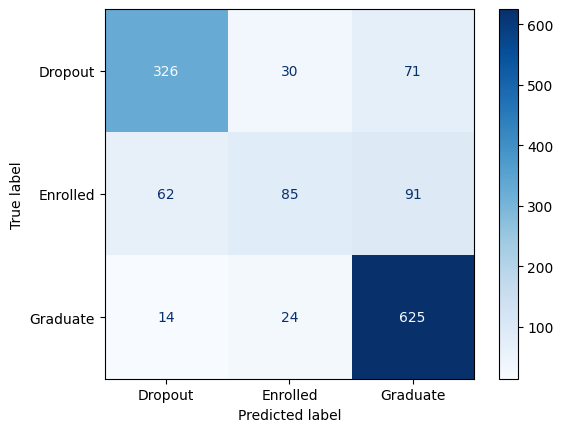

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_opt)

# Mostramos la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'd' para enteros


## Análisis de la Matriz de Confusión

La matriz de confusión generada a partir del modelo Random Forest optimizado proporciona información detallada sobre cómo el modelo clasifica cada una de las clases:

### Observaciones clave:

- **Clase "Graduate" (egresado):**
  - Es la clase mejor clasificada, con **625 aciertos sobre 663 casos reales**.
  - Tiene muy pocos errores hacia otras clases (14 como "Dropout", 24 como "Enrolled").
  - Esto se explica parcialmente porque es la clase con **más ejemplos en el dataset**, lo que facilita el aprendizaje del modelo.

- **Clase "Dropout" (desertó):**
  - Tiene un buen desempeño general: **326 predicciones correctas de 427 casos reales**.
  - Sin embargo, se observan **71 confusiones con "Graduate"**, lo cual es preocupante, ya que el modelo tiende a sobreestimar el éxito académico de algunos desertores.

- **Clase "Enrolled" (aún matriculado):**
  - Es la clase con **mayor dificultad para el modelo**.
  - Solo **85 de 238 casos reales fueron correctamente clasificados**.
  - El modelo confundió esta clase con "Dropout" (62 veces) y con "Graduate" (91 veces).
  - Este comportamiento refuerza la necesidad de trabajar con técnicas específicas para mejorar la detección de esta clase, como balanceo de datos o recolección adicional.

### Conclusión

La matriz de confusión confirma los patrones observados en las métricas previas: el modelo es confiable para predecir "Graduate", adecuado para "Dropout", pero requiere mejoras específicas para predecir correctamente a estudiantes "Enrolled", que son los más inciertos en su trayectoria académica.

Esta visualización es clave para identificar **áreas de mejora** y posibles sesgos del modelo.


In [14]:
import pandas as pd
df_preprocesado = pd.DataFrame(X_scaled, columns=X.columns)
df_preprocesado.to_csv('/content/drive/MyDrive/dataset_preprocesado.csv', index=False)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo base
log_model = LogisticRegression(random_state=42, max_iter=1000)

# Definimos el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

# Configuramos la búsqueda
grid_search_log = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

# Ejecutamos la búsqueda
grid_search_log.fit(X_train, y_train)

# Resultados
print("Modelo: Logistic Regression")
print("Mejores hiperparámetros:", grid_search_log.best_params_)
print("Mejor F1-score (macro):", grid_search_log.best_score_)

# Modelo optimizado
mejor_modelo_log = grid_search_log.best_estimator_

# Predicción y evaluación
y_pred_log = mejor_modelo_log.predict(X_test)
print(classification_report(y_test, y_pred_log, target_names=le_target.classes_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Modelo: Logistic Regression
Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor F1-score (macro): 0.6741188398087831
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.78       427
    Enrolled       0.52      0.34      0.41       238
    Graduate       0.80      0.92      0.86       663

    accuracy                           0.77      1328
   macro avg       0.71      0.67      0.68      1328
weighted avg       0.75      0.77      0.75      1328



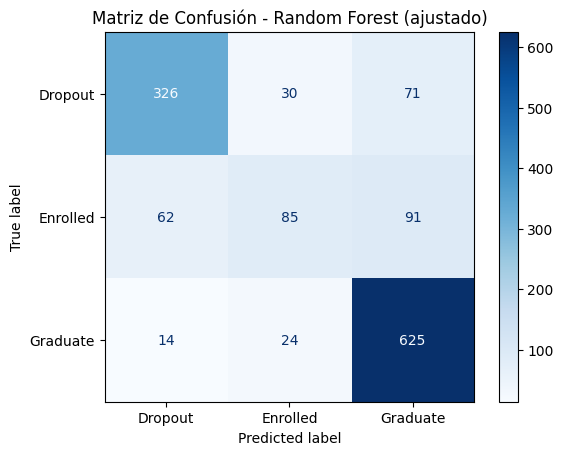

In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones del modelo ajustado
y_pred_rf_tuned = best_rf.predict(X_test)

# Matriz de confusión
cm_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=le_target.classes_)

# Visualización
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest (ajustado)")
plt.show()


In [17]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred_rf_tuned, target_names=['Dropout', 'Enrolled', 'Graduate'])

# Mostrar el reporte
print(report)


              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       427
    Enrolled       0.61      0.36      0.45       238
    Graduate       0.79      0.94      0.86       663

    accuracy                           0.78      1328
   macro avg       0.74      0.69      0.70      1328
weighted avg       0.77      0.78      0.76      1328

